# Computer Vision: MNIST revisted as a CNN

This notebook is designed to provide similar code and output that is observed in the https://misk-data-science.github.io/misk-dl/notebooks/04-mnist-revisited.nb.html R notebook.

## Required packages

In [1]:
# general helper libraries
import pandas as pd

# dataset used
from tensorflow.keras.datasets import mnist

# deep learning functionality
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models

## Prepare data

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape training data arrays
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# re-scale pixel values between 0-1
x_train = x_train / 255
x_test = x_test / 255

# reshape response variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## CNN: Feature detector

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


2021-10-28 15:10:51.791116: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## CNN: Classifier

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

## CNN: Compile & train

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5


2021-10-28 15:10:52.046414: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


375/375 [==============================] - 18s 47ms/step - loss: 0.2670 - accuracy: 0.9170 - val_loss: 0.0782 - val_accuracy: 0.9780
Epoch 2/5
375/375 [==============================] - 18s 48ms/step - loss: 0.0616 - accuracy: 0.9808 - val_loss: 0.0628 - val_accuracy: 0.9811
Epoch 3/5
375/375 [==============================] - 18s 49ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0427 - val_accuracy: 0.9866
Epoch 4/5
375/375 [==============================] - 18s 47ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0422 - val_accuracy: 0.9891
Epoch 5/5
375/375 [==============================] - 18s 47ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0351 - val_accuracy: 0.9900


<AxesSubplot:>

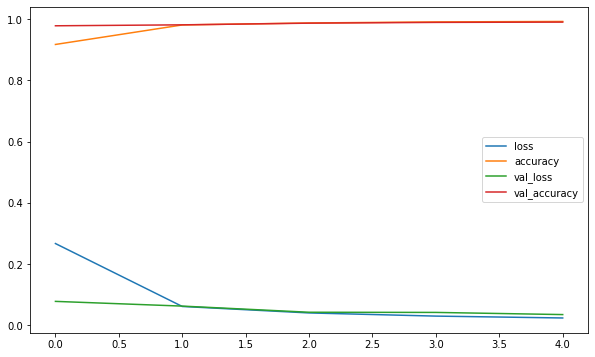

In [7]:
pd.DataFrame(history.history).plot(figsize=(10, 6))

## Evaluation

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0269 - accuracy: 0.9909


[0.02686786837875843, 0.9908999800682068]